In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Interpolation/InterpolatedDenMonth.csv')

In [3]:
df

,DATES,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,207.303532,3638.472896,810.859727
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,207.129117,3676.945791,765.118495
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,207.283705,3792.839197,732.414605
...,...,...,...,...,...,...,...,...
104,2018-08-31,1785.193900,972.274049,461.469501,414.377788,98.125058,2795.231076,733.164793
105,2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
106,2018-10-31,1667.921494,856.900384,471.261535,434.874583,92.144220,2849.606546,737.713784
107,2018-11-30,1605.136718,760.634885,454.466895,445.441639,88.965411,2840.760287,745.663358


In [4]:
dataset = df.values

In [5]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 207.4779469, 3600.0, 856.6009594000002],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 207.30353190000002, 3638.472895666667,
        810.8597272333334],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 207.12911689999999,
        3676.945791333333, 765.1184950666667],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        206.9547019, 3715.418687, 719.3772629],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 207.28370463333331,
        3792.8391966666654, 732.4146046],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 207.61270736666665,
        3870.2597063333333, 745.4519462999999],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 1

In [6]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.21536771, 0.34358992, 0.28760773, 1.        , 0.14011453,
        0.70628215],
       [0.21549004, 0.35192007, 0.32225043, 0.9605532 , 0.13991371,
        0.72165108],
       [0.21561238, 0.36025022, 0.35689312, 0.92110641, 0.13971289,
        0.73702   ],
       [0.21573472, 0.36858036, 0.39153581, 0.88165961, 0.13951207,
        0.75238893],
       [0.21309775, 0.37683871, 0.30995679, 0.58777307, 0.13989088,
        0.78331641],
       [0.21046078, 0.38509706, 0.22837778, 0.29388654, 0.14026969,
        0.8142439 ],
       [0.2078238 , 0.3933554 , 0.14679876, 0.        , 0.1406485 ,
        0.84517139],
       [0.19576386, 0.38652631, 0.09786584, 0.0434695 , 0.14038687,
        0.85238924],
       [0.18370391, 0.37969722, 0.04893292, 0.086939  , 0.14012524,
        0.85960709],
       [0.17164397, 0.37286814, 0.        , 0.1304085 , 0.13986361,
        0.86682494],
       [0.19455526, 0.37922834, 0.05993416, 0.14266337, 0.14557165,
        0.90348124],
       [0.21746656, 0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 6) (11, 6) (11, 6) (87,) (11,) (11,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='softplus', input_shape=(6,)),
    Dense(32, activation='softplus'),
    Dense(12, activation='softplus'),
    Dense(1, activation='softplus'),
])

In [13]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 87 samples, validate on 11 samples
Epoch 1/1500
87/87 [==============================] - 0s 4ms/step - loss: 729.1453 - val_loss: 686.9617
Epoch 2/1500
87/87 [==============================] - 0s 46us/step - loss: 729.1331 - val_loss: 686.9492
Epoch 3/1500
87/87 [==============================] - 0s 57us/step - loss: 729.1203 - val_loss: 686.9351
Epoch 4/1500
87/87 [==============================] - 0s 57us/step - loss: 729.1063 - val_loss: 686.9195
Epoch 5/1500
87/87 [==============================] - 0s 57us/step - loss: 729.0905 - val_loss: 686.9019
Epoch 6/1500
87/87 [==============================] - 0s 57us/step - loss: 729.0729 - val_loss: 686.8822
Epoch 7/1500
87/87 [==============================] - 0s 46us/step - loss: 729.0530 - val_loss: 686.8600
Epoch 8/1500
87/87 [==============================] - 0s 57us/step - loss: 729.0307 - val_loss: 686.8353
Epoch 9/1500
87/87 [==============================] - 0s 57us/step - loss: 729.0060 - val_loss: 686.8080
Epoch 10/150

Epoch 78/1500
87/87 [==============================] - 0s 46us/step - loss: 724.2153 - val_loss: 681.8720
Epoch 79/1500
87/87 [==============================] - 0s 46us/step - loss: 724.1307 - val_loss: 681.7842
Epoch 80/1500
87/87 [==============================] - 0s 46us/step - loss: 724.0457 - val_loss: 681.6960
Epoch 81/1500
87/87 [==============================] - 0s 46us/step - loss: 723.9603 - val_loss: 681.6074
Epoch 82/1500
87/87 [==============================] - 0s 34us/step - loss: 723.8746 - val_loss: 681.5181
Epoch 83/1500
87/87 [==============================] - 0s 46us/step - loss: 723.7883 - val_loss: 681.4283
Epoch 84/1500
87/87 [==============================] - 0s 46us/step - loss: 723.7015 - val_loss: 681.3381
Epoch 85/1500
87/87 [==============================] - 0s 57us/step - loss: 723.6142 - val_loss: 681.2473
Epoch 86/1500
87/87 [==============================] - 0s 46us/step - loss: 723.5266 - val_loss: 681.1558
Epoch 87/1500
87/87 [=========================

Epoch 155/1500
87/87 [==============================] - 0s 46us/step - loss: 715.6271 - val_loss: 672.7094
Epoch 156/1500
87/87 [==============================] - 0s 34us/step - loss: 715.4765 - val_loss: 672.5450
Epoch 157/1500
87/87 [==============================] - 0s 35us/step - loss: 715.3246 - val_loss: 672.3792
Epoch 158/1500
87/87 [==============================] - 0s 34us/step - loss: 715.1714 - val_loss: 672.2117
Epoch 159/1500
87/87 [==============================] - 0s 34us/step - loss: 715.0169 - val_loss: 672.0428
Epoch 160/1500
87/87 [==============================] - 0s 34us/step - loss: 714.8610 - val_loss: 671.8723
Epoch 161/1500
87/87 [==============================] - 0s 46us/step - loss: 714.7037 - val_loss: 671.7003
Epoch 162/1500
87/87 [==============================] - 0s 34us/step - loss: 714.5451 - val_loss: 671.5266
Epoch 163/1500
87/87 [==============================] - 0s 35us/step - loss: 714.3851 - val_loss: 671.3513
Epoch 164/1500
87/87 [===============

Epoch 232/1500
87/87 [==============================] - 0s 46us/step - loss: 699.0704 - val_loss: 654.2412
Epoch 233/1500
87/87 [==============================] - 0s 34us/step - loss: 698.7724 - val_loss: 653.9037
Epoch 234/1500
87/87 [==============================] - 0s 35us/step - loss: 698.4719 - val_loss: 653.5633
Epoch 235/1500
87/87 [==============================] - 0s 35us/step - loss: 698.1689 - val_loss: 653.2200
Epoch 236/1500
87/87 [==============================] - 0s 34us/step - loss: 697.8634 - val_loss: 652.8737
Epoch 237/1500
87/87 [==============================] - 0s 34us/step - loss: 697.5554 - val_loss: 652.5244
Epoch 238/1500
87/87 [==============================] - 0s 46us/step - loss: 697.2449 - val_loss: 652.1721
Epoch 239/1500
87/87 [==============================] - 0s 34us/step - loss: 696.9318 - val_loss: 651.8169
Epoch 240/1500
87/87 [==============================] - 0s 46us/step - loss: 696.6161 - val_loss: 651.4586
Epoch 241/1500
87/87 [===============

Epoch 309/1500
87/87 [==============================] - 0s 34us/step - loss: 667.8141 - val_loss: 618.3717
Epoch 310/1500
87/87 [==============================] - 0s 34us/step - loss: 667.2812 - val_loss: 617.7540
Epoch 311/1500
87/87 [==============================] - 0s 46us/step - loss: 666.7446 - val_loss: 617.1318
Epoch 312/1500
87/87 [==============================] - 0s 46us/step - loss: 666.2043 - val_loss: 616.5051
Epoch 313/1500
87/87 [==============================] - 0s 34us/step - loss: 665.6603 - val_loss: 615.8740
Epoch 314/1500
87/87 [==============================] - 0s 46us/step - loss: 665.1124 - val_loss: 615.2383
Epoch 315/1500
87/87 [==============================] - 0s 46us/step - loss: 664.5609 - val_loss: 614.5980
Epoch 316/1500
87/87 [==============================] - 0s 46us/step - loss: 664.0054 - val_loss: 613.9532
Epoch 317/1500
87/87 [==============================] - 0s 58us/step - loss: 663.4461 - val_loss: 613.3037
Epoch 318/1500
87/87 [===============

Epoch 386/1500
87/87 [==============================] - 0s 57us/step - loss: 614.5176 - val_loss: 556.0113
Epoch 387/1500
87/87 [==============================] - 0s 34us/step - loss: 613.6418 - val_loss: 554.9793
Epoch 388/1500
87/87 [==============================] - 0s 34us/step - loss: 612.7608 - val_loss: 553.9410
Epoch 389/1500
87/87 [==============================] - 0s 57us/step - loss: 611.8746 - val_loss: 552.8962
Epoch 390/1500
87/87 [==============================] - 0s 46us/step - loss: 610.9831 - val_loss: 551.8451
Epoch 391/1500
87/87 [==============================] - 0s 46us/step - loss: 610.0862 - val_loss: 550.7874
Epoch 392/1500
87/87 [==============================] - 0s 46us/step - loss: 609.1839 - val_loss: 549.7233
Epoch 393/1500
87/87 [==============================] - 0s 46us/step - loss: 608.2764 - val_loss: 548.6527
Epoch 394/1500
87/87 [==============================] - 0s 34us/step - loss: 607.3634 - val_loss: 547.5756
Epoch 395/1500
87/87 [===============

Epoch 463/1500
87/87 [==============================] - 0s 46us/step - loss: 530.0408 - val_loss: 455.8263
Epoch 464/1500
87/87 [==============================] - 0s 57us/step - loss: 528.6927 - val_loss: 454.2195
Epoch 465/1500
87/87 [==============================] - 0s 46us/step - loss: 527.3376 - val_loss: 452.6040
Epoch 466/1500
87/87 [==============================] - 0s 46us/step - loss: 525.9754 - val_loss: 450.9799
Epoch 467/1500
87/87 [==============================] - 0s 58us/step - loss: 524.6061 - val_loss: 449.3470
Epoch 468/1500
87/87 [==============================] - 0s 46us/step - loss: 523.2294 - val_loss: 447.7054
Epoch 469/1500
87/87 [==============================] - 0s 46us/step - loss: 521.8457 - val_loss: 446.0551
Epoch 470/1500
87/87 [==============================] - 0s 35us/step - loss: 520.4548 - val_loss: 444.3960
Epoch 471/1500
87/87 [==============================] - 0s 34us/step - loss: 519.0566 - val_loss: 442.7279
Epoch 472/1500
87/87 [===============

Epoch 540/1500
87/87 [==============================] - 0s 46us/step - loss: 403.5418 - val_loss: 304.3409
Epoch 541/1500
87/87 [==============================] - 0s 46us/step - loss: 401.5683 - val_loss: 301.9684
Epoch 542/1500
87/87 [==============================] - 0s 46us/step - loss: 399.5858 - val_loss: 299.5847
Epoch 543/1500
87/87 [==============================] - 0s 58us/step - loss: 397.5938 - val_loss: 297.1894
Epoch 544/1500
87/87 [==============================] - 0s 46us/step - loss: 395.5926 - val_loss: 294.7827
Epoch 545/1500
87/87 [==============================] - 0s 57us/step - loss: 393.5819 - val_loss: 292.3646
Epoch 546/1500
87/87 [==============================] - 0s 34us/step - loss: 391.5620 - val_loss: 289.9350
Epoch 547/1500
87/87 [==============================] - 0s 34us/step - loss: 389.5327 - val_loss: 287.4938
Epoch 548/1500
87/87 [==============================] - 0s 34us/step - loss: 387.4940 - val_loss: 285.0410
Epoch 549/1500
87/87 [===============

Epoch 617/1500
87/87 [==============================] - 0s 34us/step - loss: 231.3234 - val_loss: 165.7295
Epoch 618/1500
87/87 [==============================] - 0s 35us/step - loss: 229.1086 - val_loss: 166.0579
Epoch 619/1500
87/87 [==============================] - 0s 34us/step - loss: 226.8741 - val_loss: 166.3902
Epoch 620/1500
87/87 [==============================] - 0s 58us/step - loss: 224.6208 - val_loss: 166.7263
Epoch 621/1500
87/87 [==============================] - 0s 46us/step - loss: 222.3496 - val_loss: 167.0660
Epoch 622/1500
87/87 [==============================] - 0s 57us/step - loss: 220.0610 - val_loss: 167.4091
Epoch 623/1500
87/87 [==============================] - 0s 46us/step - loss: 217.8534 - val_loss: 167.7006
Epoch 624/1500
87/87 [==============================] - 0s 46us/step - loss: 216.0207 - val_loss: 167.9791
Epoch 625/1500
87/87 [==============================] - 0s 46us/step - loss: 214.2500 - val_loss: 168.2650
Epoch 626/1500
87/87 [===============

Epoch 694/1500
87/87 [==============================] - 0s 46us/step - loss: 115.4574 - val_loss: 222.3177
Epoch 695/1500
87/87 [==============================] - 0s 46us/step - loss: 115.1213 - val_loss: 223.0360
Epoch 696/1500
87/87 [==============================] - 0s 46us/step - loss: 114.7754 - val_loss: 223.7980
Epoch 697/1500
87/87 [==============================] - 0s 35us/step - loss: 114.4590 - val_loss: 224.2131
Epoch 698/1500
87/87 [==============================] - 0s 46us/step - loss: 114.2523 - val_loss: 224.5021
Epoch 699/1500
87/87 [==============================] - 0s 35us/step - loss: 114.0937 - val_loss: 224.3997
Epoch 700/1500
87/87 [==============================] - 0s 34us/step - loss: 113.9817 - val_loss: 224.3303
Epoch 701/1500
87/87 [==============================] - 0s 35us/step - loss: 113.8733 - val_loss: 224.2888
Epoch 702/1500
87/87 [==============================] - 0s 46us/step - loss: 113.7670 - val_loss: 224.2725
Epoch 703/1500
87/87 [===============

Epoch 771/1500
87/87 [==============================] - 0s 34us/step - loss: 106.2463 - val_loss: 218.5337
Epoch 772/1500
87/87 [==============================] - 0s 46us/step - loss: 106.1170 - val_loss: 217.8526
Epoch 773/1500
87/87 [==============================] - 0s 46us/step - loss: 105.9953 - val_loss: 219.1861
Epoch 774/1500
87/87 [==============================] - 0s 35us/step - loss: 105.8932 - val_loss: 216.7933
Epoch 775/1500
87/87 [==============================] - 0s 34us/step - loss: 105.8366 - val_loss: 220.0922
Epoch 776/1500
87/87 [==============================] - 0s 46us/step - loss: 105.8161 - val_loss: 216.2694
Epoch 777/1500
87/87 [==============================] - 0s 35us/step - loss: 105.6701 - val_loss: 218.8805
Epoch 778/1500
87/87 [==============================] - 0s 34us/step - loss: 105.4776 - val_loss: 217.1263
Epoch 779/1500
87/87 [==============================] - 0s 35us/step - loss: 105.3367 - val_loss: 218.2923
Epoch 780/1500
87/87 [===============

Epoch 848/1500
87/87 [==============================] - 0s 34us/step - loss: 98.0618 - val_loss: 210.2955
Epoch 849/1500
87/87 [==============================] - 0s 46us/step - loss: 98.0018 - val_loss: 208.8386
Epoch 850/1500
87/87 [==============================] - 0s 35us/step - loss: 97.8477 - val_loss: 210.1670
Epoch 851/1500
87/87 [==============================] - 0s 34us/step - loss: 97.8064 - val_loss: 208.7067
Epoch 852/1500
87/87 [==============================] - 0s 57us/step - loss: 97.6339 - val_loss: 208.6770
Epoch 853/1500
87/87 [==============================] - 0s 46us/step - loss: 97.5305 - val_loss: 208.6556
Epoch 854/1500
87/87 [==============================] - 0s 58us/step - loss: 97.4258 - val_loss: 207.8232
Epoch 855/1500
87/87 [==============================] - 0s 46us/step - loss: 97.3726 - val_loss: 209.9764
Epoch 856/1500
87/87 [==============================] - 0s 35us/step - loss: 97.3225 - val_loss: 208.4647
Epoch 857/1500
87/87 [========================

Epoch 926/1500
87/87 [==============================] - 0s 34us/step - loss: 89.5065 - val_loss: 201.0128
Epoch 927/1500
87/87 [==============================] - 0s 34us/step - loss: 89.4034 - val_loss: 200.3768
Epoch 928/1500
87/87 [==============================] - 0s 46us/step - loss: 89.2823 - val_loss: 199.7431
Epoch 929/1500
87/87 [==============================] - 0s 46us/step - loss: 89.1611 - val_loss: 199.2310
Epoch 930/1500
87/87 [==============================] - 0s 46us/step - loss: 89.0398 - val_loss: 198.7329
Epoch 931/1500
87/87 [==============================] - 0s 46us/step - loss: 88.9183 - val_loss: 198.2367
Epoch 932/1500
87/87 [==============================] - 0s 34us/step - loss: 88.8114 - val_loss: 199.9774
Epoch 933/1500
87/87 [==============================] - 0s 34us/step - loss: 88.7127 - val_loss: 199.3271
Epoch 934/1500
87/87 [==============================] - 0s 34us/step - loss: 88.5888 - val_loss: 198.6887
Epoch 935/1500
87/87 [========================

Epoch 1004/1500
87/87 [==============================] - 0s 46us/step - loss: 80.2753 - val_loss: 186.8689
Epoch 1005/1500
87/87 [==============================] - 0s 34us/step - loss: 80.1568 - val_loss: 189.0294
Epoch 1006/1500
87/87 [==============================] - 0s 46us/step - loss: 80.0553 - val_loss: 186.7837
Epoch 1007/1500
87/87 [==============================] - 0s 46us/step - loss: 79.9083 - val_loss: 188.8658
Epoch 1008/1500
87/87 [==============================] - 0s 34us/step - loss: 79.8372 - val_loss: 186.6905
Epoch 1009/1500
87/87 [==============================] - 0s 46us/step - loss: 79.6729 - val_loss: 186.6463
Epoch 1010/1500
87/87 [==============================] - 0s 69us/step - loss: 79.5560 - val_loss: 186.6154
Epoch 1011/1500
87/87 [==============================] - 0s 46us/step - loss: 79.4377 - val_loss: 186.5986
Epoch 1012/1500
87/87 [==============================] - 0s 46us/step - loss: 79.3192 - val_loss: 185.4381
Epoch 1013/1500
87/87 [==============

Epoch 1081/1500
87/87 [==============================] - 0s 34us/step - loss: 71.1073 - val_loss: 172.0378
Epoch 1082/1500
87/87 [==============================] - 0s 57us/step - loss: 70.9706 - val_loss: 171.2279
Epoch 1083/1500
87/87 [==============================] - 0s 69us/step - loss: 70.8522 - val_loss: 172.2155
Epoch 1084/1500
87/87 [==============================] - 0s 46us/step - loss: 70.7197 - val_loss: 171.3982
Epoch 1085/1500
87/87 [==============================] - 0s 58us/step - loss: 70.5819 - val_loss: 170.6025
Epoch 1086/1500
87/87 [==============================] - 0s 34us/step - loss: 70.4589 - val_loss: 171.7164
Epoch 1087/1500
87/87 [==============================] - 0s 57us/step - loss: 70.3285 - val_loss: 170.9154
Epoch 1088/1500
87/87 [==============================] - 0s 46us/step - loss: 70.1897 - val_loss: 170.1395
Epoch 1089/1500
87/87 [==============================] - 0s 46us/step - loss: 70.0556 - val_loss: 171.3686
Epoch 1090/1500
87/87 [==============

Epoch 1158/1500
87/87 [==============================] - 0s 46us/step - loss: 61.4685 - val_loss: 153.6951
Epoch 1159/1500
87/87 [==============================] - 0s 46us/step - loss: 61.3323 - val_loss: 155.2543
Epoch 1160/1500
87/87 [==============================] - 0s 35us/step - loss: 61.1981 - val_loss: 153.3946
Epoch 1161/1500
87/87 [==============================] - 0s 46us/step - loss: 61.0830 - val_loss: 155.0127
Epoch 1162/1500
87/87 [==============================] - 0s 46us/step - loss: 60.9967 - val_loss: 153.1606
Epoch 1163/1500
87/87 [==============================] - 0s 46us/step - loss: 60.8417 - val_loss: 153.9984
Epoch 1164/1500
87/87 [==============================] - 0s 34us/step - loss: 60.7404 - val_loss: 152.2488
Epoch 1165/1500
87/87 [==============================] - 0s 34us/step - loss: 60.6514 - val_loss: 154.5273
Epoch 1166/1500
87/87 [==============================] - 0s 46us/step - loss: 60.5948 - val_loss: 152.0030
Epoch 1167/1500
87/87 [==============

Epoch 1235/1500
87/87 [==============================] - 0s 35us/step - loss: 52.7351 - val_loss: 136.2612
Epoch 1236/1500
87/87 [==============================] - 0s 46us/step - loss: 52.5973 - val_loss: 134.4319
Epoch 1237/1500
87/87 [==============================] - 0s 34us/step - loss: 52.5199 - val_loss: 135.7965
Epoch 1238/1500
87/87 [==============================] - 0s 46us/step - loss: 52.4159 - val_loss: 134.0441
Epoch 1239/1500
87/87 [==============================] - 0s 57us/step - loss: 52.3114 - val_loss: 135.3419
Epoch 1240/1500
87/87 [==============================] - 0s 57us/step - loss: 52.2393 - val_loss: 133.3125
Epoch 1241/1500
87/87 [==============================] - 0s 34us/step - loss: 52.2048 - val_loss: 134.8394
Epoch 1242/1500
87/87 [==============================] - 0s 34us/step - loss: 52.0631 - val_loss: 132.9697
Epoch 1243/1500
87/87 [==============================] - 0s 46us/step - loss: 52.0127 - val_loss: 134.3607
Epoch 1244/1500
87/87 [==============

Epoch 1312/1500
87/87 [==============================] - 0s 57us/step - loss: 46.0045 - val_loss: 114.9961
Epoch 1313/1500
87/87 [==============================] - 0s 57us/step - loss: 45.9269 - val_loss: 116.8922
Epoch 1314/1500
87/87 [==============================] - 0s 35us/step - loss: 45.7882 - val_loss: 115.1021
Epoch 1315/1500
87/87 [==============================] - 0s 46us/step - loss: 45.6474 - val_loss: 115.7319
Epoch 1316/1500
87/87 [==============================] - 0s 34us/step - loss: 45.5507 - val_loss: 114.7326
Epoch 1317/1500
87/87 [==============================] - 0s 34us/step - loss: 45.4823 - val_loss: 115.4001
Epoch 1318/1500
87/87 [==============================] - 0s 34us/step - loss: 45.4201 - val_loss: 114.3750
Epoch 1319/1500
87/87 [==============================] - 0s 46us/step - loss: 45.3231 - val_loss: 114.7012
Epoch 1320/1500
87/87 [==============================] - 0s 46us/step - loss: 45.2453 - val_loss: 113.6441
Epoch 1321/1500
87/87 [==============

Epoch 1389/1500
87/87 [==============================] - 0s 46us/step - loss: 41.6562 - val_loss: 99.7410
Epoch 1390/1500
87/87 [==============================] - 0s 46us/step - loss: 41.6082 - val_loss: 99.3830
Epoch 1391/1500
87/87 [==============================] - 0s 58us/step - loss: 41.5616 - val_loss: 99.9752
Epoch 1392/1500
87/87 [==============================] - 0s 46us/step - loss: 41.5420 - val_loss: 98.5871
Epoch 1393/1500
87/87 [==============================] - 0s 69us/step - loss: 41.4700 - val_loss: 99.1797
Epoch 1394/1500
87/87 [==============================] - 0s 34us/step - loss: 41.4263 - val_loss: 97.8071
Epoch 1395/1500
87/87 [==============================] - 0s 34us/step - loss: 41.3846 - val_loss: 99.2144
Epoch 1396/1500
87/87 [==============================] - 0s 46us/step - loss: 41.3771 - val_loss: 97.9372
Epoch 1397/1500
87/87 [==============================] - 0s 35us/step - loss: 41.2711 - val_loss: 97.5872
Epoch 1398/1500
87/87 [=======================

Epoch 1467/1500
87/87 [==============================] - 0s 34us/step - loss: 38.9940 - val_loss: 81.0173
Epoch 1468/1500
87/87 [==============================] - 0s 34us/step - loss: 38.9229 - val_loss: 80.0830
Epoch 1469/1500
87/87 [==============================] - 0s 46us/step - loss: 38.8596 - val_loss: 80.0646
Epoch 1470/1500
87/87 [==============================] - 0s 34us/step - loss: 38.8384 - val_loss: 80.0508
Epoch 1471/1500
87/87 [==============================] - 0s 34us/step - loss: 38.8205 - val_loss: 79.0400
Epoch 1472/1500
87/87 [==============================] - 0s 46us/step - loss: 38.8383 - val_loss: 80.5674
Epoch 1473/1500
87/87 [==============================] - 0s 46us/step - loss: 38.8272 - val_loss: 79.5874
Epoch 1474/1500
87/87 [==============================] - 0s 46us/step - loss: 38.7543 - val_loss: 79.5721
Epoch 1475/1500
87/87 [==============================] - 0s 35us/step - loss: 38.7376 - val_loss: 78.5581
Epoch 1476/1500
87/87 [=======================

In [15]:
import matplotlib.pyplot as plt

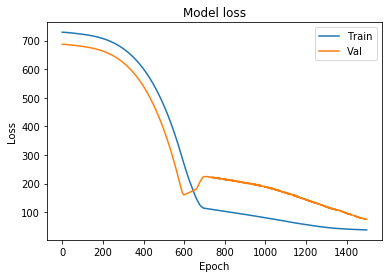

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [17]:
# serialize model to JSON
model_json = model.to_json()
with open("modelden.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelden.h5")
print("Saved model to disk")

Saved model to disk
